# Traffic Analysis
This notebook will serve as the primary means of documentation for creating a traffic analysis model

_______________________________________________________________________________________________________________________________________________

### Full group includes:
- Jordan Brown
- Dylan Roy
- Maxwell Barret
- Julia Dewhurt

### Primary notebook contributers:

***The primary notebook contributers are the group members who were assigned to this specific task. All group members will work in collaboration to create a final working product. However, the nature of this project calls for the full group to be assigned to primary tasks.***

- ""
- ""
_______________________________________________________________________________________________________________________________________________

## Notebook Goal/Purpose

This notebook will be used to develop and test a model for analyzing and predicting the flow of traffic. This will involve data visualization, feature selection, and baseline comparison. The final intent for the dataloader is that this method will be able to take information from our object detection dataset and use that train local traffic systems on an ever increasing dataset. This will hopefully allow for improved traffic flow and a better understanding of the area for future city planning.
_______________________________________________________________________________________________________________________________________________

## Code Cells should use the following layout template

```
"""
At the top will be a commment block
this comment block will describe the
primary purpose for the cells code.
"""

# A comment stating used libary(s)

Code
    Implementation
        Goes
            Here

```

In [ ]:
"""
This cell will contain the import statements for the notebook.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("Traffic.csv")

In [4]:
#brief look at the data
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [6]:
#check for duplicated and missing values
df.duplicated().sum()


0

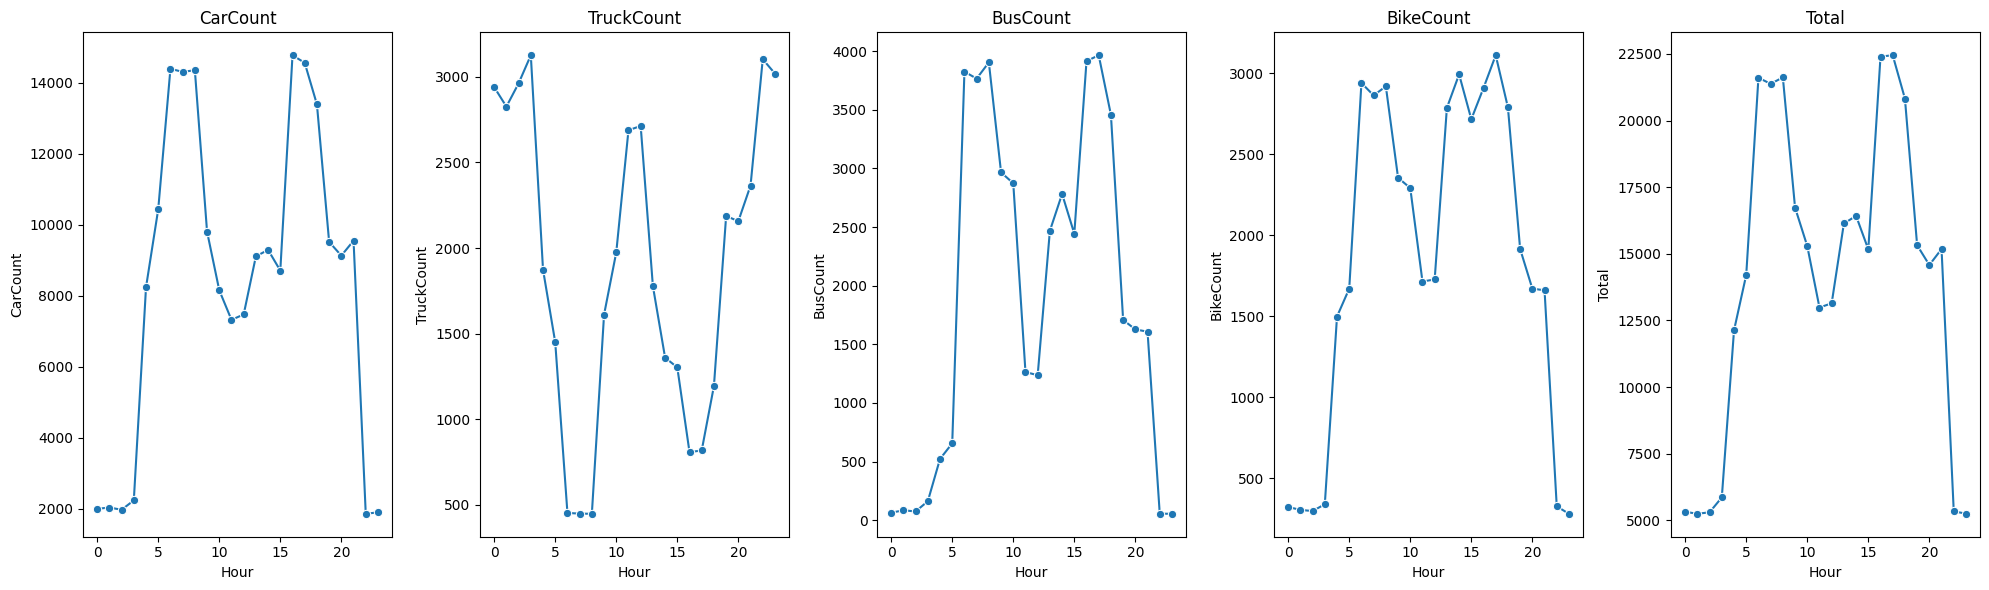

In [7]:
#Dataset visualization for hourly vehicle counts
df['Hour'] = pd.to_datetime(df["Time"], format="%I:%M:%S %p").dt.hour

vehicle_columns = ["CarCount", "TruckCount", "BusCount", "BikeCount", "Total"]
hourly_vehicle_counts = df.groupby("Hour")[vehicle_columns].sum()

fig, ax = plt.subplots(1, 5, figsize=(20, 6))

#create line plots for each vehicle type
for i, column in enumerate(vehicle_columns):
    sns.lineplot(data=hourly_vehicle_counts, x="Hour", y=column, ax=ax[i], marker="o")
    ax[i].set_title(column)
    
plt.tight_layout()
plt.show()


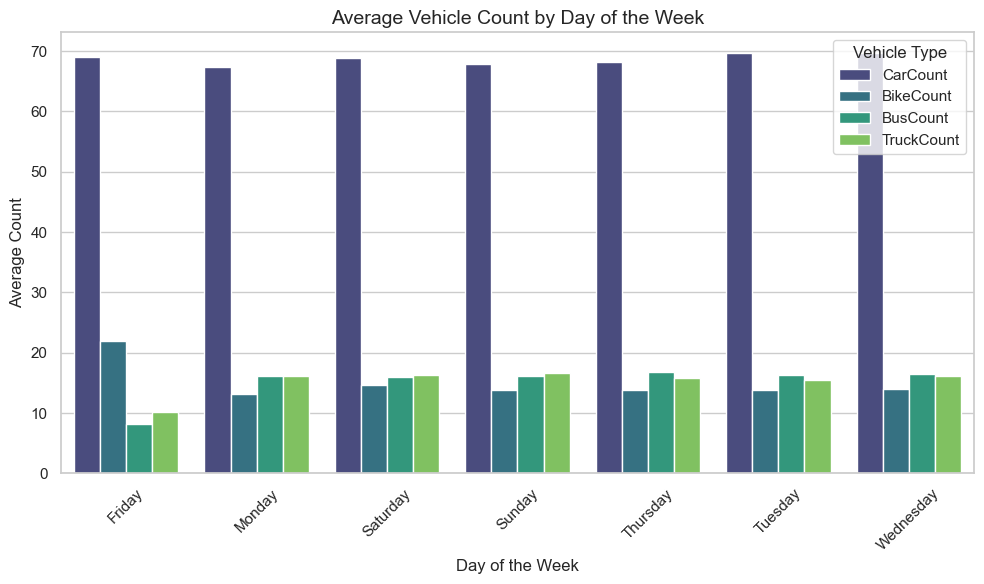

In [ ]:
#show the average vehicle count by day of the week
numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']


grouped_df = df.groupby('Day of the week')[numeric_columns].mean()


grouped_df = grouped_df.reset_index()

grouped_df_melted = pd.melt(grouped_df, id_vars='Day of the week', var_name='Vehicle Type', value_name='Count')

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")


sns.barplot(x='Day of the week', y='Count', hue='Vehicle Type', data=grouped_df_melted, palette='viridis')


plt.xticks(rotation=45)


plt.title('Average Vehicle Count by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Count', fontsize=12)


plt.tight_layout()
plt.show()


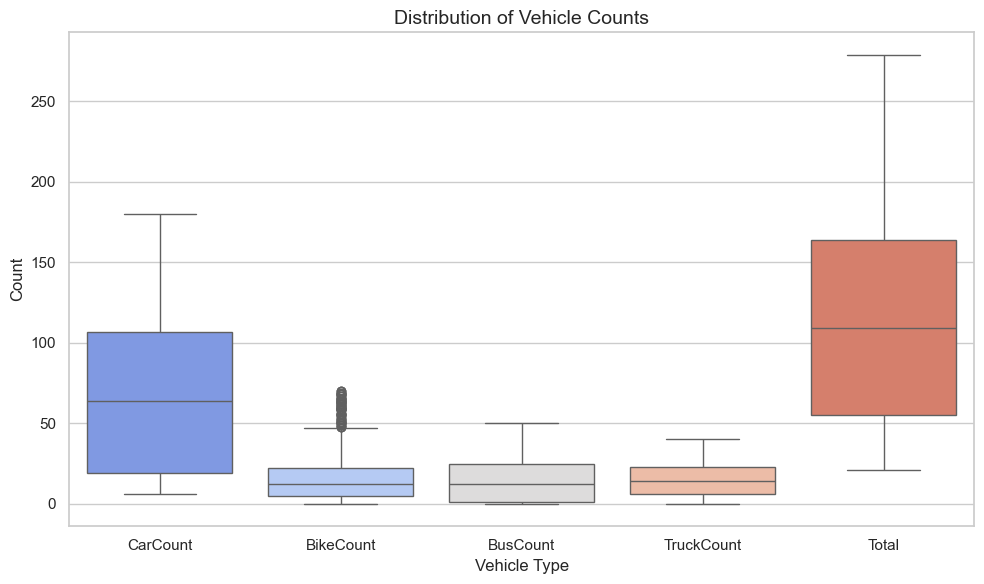

In [9]:
#distribution of vehicle counts
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']], palette='coolwarm')

plt.title('Distribution of Vehicle Counts', fontsize=14)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# chi squared 
X = pd.df(df.data, columns=df.feature_names)
y = df.target

# chi 2 feature extraction
'''
ch2_FeatureSelect = SelectKBest(chi2, k=2)
X_new = ch2_FeatureSelect.fit_transform(X,y)

feature_selection = X.columns[ch2_FeatureSelect.get_support()]
print("Selected Features: ", feature_selection)

'''
# break into timestamps into hour, minute, second 
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df["Time"].dt.hour
df['Minute'] = df["Time"].dt.minute
df['Second'] = df["Time"].dt.second 

def categorize_time(Hour):
    if 5<= Hour < 12:
        return "Morning"
    elif 12 <= Hour <17:
        return "Afternoon"
    elif 17<=Hour<=21:
        return "Evening"
    elif 21<=Hour<24:
        return "Night"
    
df['Minute Category'] = pd.cut(df)






In [ ]:
#label encoding - use this on categorical data
LabelEncoder = LabelEncoder()
df['Day of the week'] = LabelEncoder.fit_transform(df['Day of the week'])
df["AM/PM"] = LabelEncoder.fit_transform(df["AM/PM"])

X = df.drop(columns=["Traffic Situation"])
y = df["Traffic Situation"]

y = LabelEncoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#standardize the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LabelEncoder.classes_)
disp.plot()
plt.show()

ValueError: could not convert string to float: '5:15:00 AM'